# 通过人脸猜测性别年龄


### 为什么重要？

    * 年龄和性别是最重要的两个基本属性
    
    * 脸是重要的ID
    
    * 应用场景多：几乎所有商业场所
    
    
### 方法可扩展

    * 性别 -> 是否购买
    
    * 年龄 -> 满意程度
    


# 我们将会实现这样一个产品



<img src="./sources/i1.png" alt="drawing" width="800"/>

<img src="./sources/i2.png" alt="drawing" width="800"/>

<img src="./sources/i3.png" alt="drawing" width="800"/>

In [1]:
%%HTML
<div align="middle"><video width="80%" controls><source src="./sources/demo2.m4v" type="video/mp4"
</video></div>

# 深度学习是有监督问题


这意味着

    * 需要X
    * 需要有标记的Y
    
###  X怎么来
     * 图片/视频：网络搜索结果
     * 文本：新闻报纸，著作
     
### Y怎么来
    * 人工标记：时薪40元

### 拉框
<img src="./sources/labeling.png" alt="drawing" width="800"/>

# 对于人脸识别年龄性别的问题: 


# 需要<font color="#660066">大量</font>带有<font color="#006666">年龄</font>标记的<font color="#666600">照片</font>



## 你有什么办法？

<img src="./sources/bean.png" alt="drawing" width="800"/>

# 数据及的基本情况

    * 50万张照片，1万+个明星，全球各地，欧美人为主
    
    * 年龄性别均匀分布
    
    * 包含人脸，基于规则的初步筛选+人工筛选
    

# X长什么样子——图像



<img src="./sources/Pixel-example.png" alt="drawing" width="800"/>
(https://en.wikipedia.org/wiki/Pixel)

# 图像在电子屏幕上的显示



<img src="./sources/Pixel_geometry.jpg" alt="drawing" width="800"/>
(https://en.wikipedia.org/wiki/Pixel)

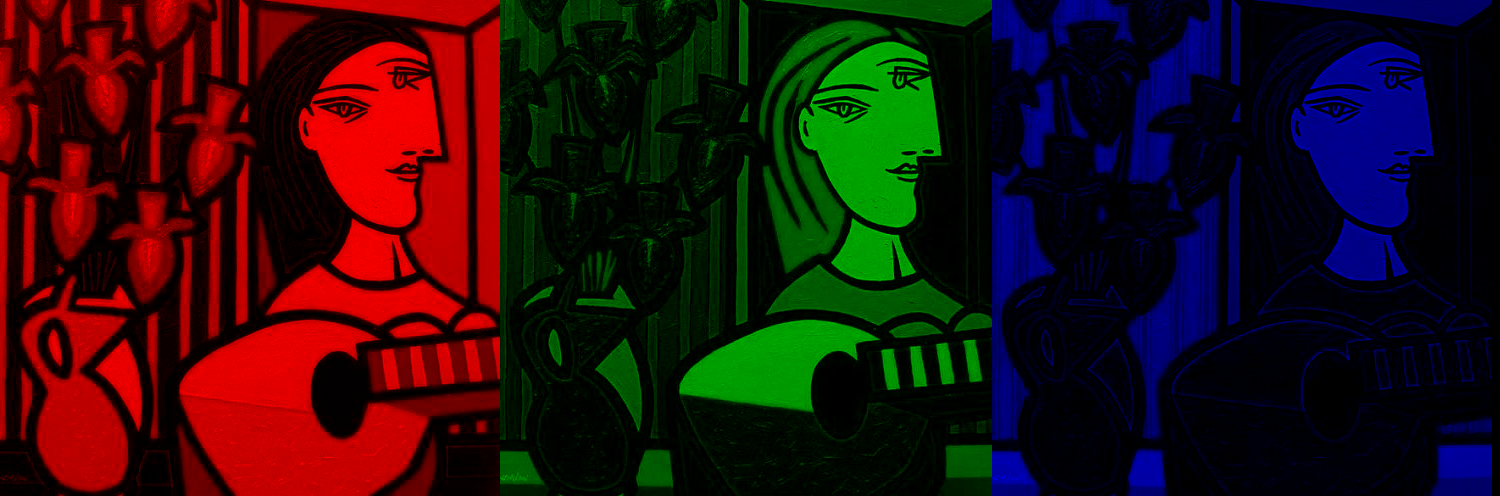

In [3]:
from PIL import Image
import numpy as np
im = Image.open("./sources/picaso.jpg")
a = np.array(im)
aa = Image.fromarray(a)
b = a.copy()
b[:,:,0] = 0
b[:,:,1] = 0
bb = Image.fromarray(b)

c = a.copy()
c[:,:,0] = 0
c[:,:,2] = 0
cc = Image.fromarray(c)

d = a.copy()
d[:,:,1] = 0
d[:,:,2] = 0
dd = Image.fromarray(d)

new_im = Image.new('RGB', (aa.size[0] * 3 ,aa.size[1] * 1))

new_im.paste(dd, ( 0, 0))
new_im.paste(cc, (aa.size[0], 0))
new_im.paste(bb, (aa.size[1] * 2, 0))
new_im
#new_im.save("./sources/rgb_example.jpg")

In [4]:
dd.size

(500, 496)

# RGB的分分解
<img src="./sources/rgb_example.jpg" alt="drawing" width="800"/>

In [3]:
eye = Image.fromarray(a[100:120, 320:360,0])
x = (a[100:120, 320:360,0] > 120)
for i in x:
    for j in i:
        if j:
            print(' ', end='')
        else:
            print('1', end='')
    print()

111111111111111111          111111111111
11111111111111                  11111111
111111111        1111111111        11111
111         11111111111111111111      11
        1111111111111111111111111111    
  111111111111111111111111111111111111  
111111111111111111111 111   111111111111
111111111111     1111 111   11111  11111
 11111111        1111 111  11111       1
    1111111      1111 111  11111       1
       1111111   1111  11  11111    1111
         111111111111     11111  1111111
            111111111     1111111111111 
              11111111   1111111111     
                  11111 1111111        1
                   1111111111        111
                    11111111       11111
                     111          111111
                                111111  
                               11111    


<img src="./sources/eye.png" alt="drawing" width="400"/>

 <img src="./sources/cat.png" alt="drawing" width="800"/>

# 总结一下，图像的特征


和传统的自变量$$x = (x_1, x_2, \cdots, x_p)$$ 相比

    * 图像是三维矩阵 (长，宽，通道)

    * 矩阵元素的取值是0-255

    * 图像具有强烈的局部相关性（local correlated）

    * 你还能想到什么？

# Regression！

深度学习的Y和普通的Y一样，X有一些不一样，我们要决定一个
$$\hat{y} = f(x; \theta)$$
来估计因变量


## 初步尝试

把三维矩阵$X$ 拉直到 $ x = (0,0,0,\cdots, 122, 255,255,\cdots) \in \mathbb{R}^{whc}$ 直接做分类/回归？

## 可以吗？


# 可以

接下来，我们从对图像的普通逻辑回归出发。

为了直观的理解模型，我们使用一个简单一些的数据集，MNIST手写数字：

<img src="./sources/mnist.png" alt="drawing" width="800"/>

我们隐藏了所有的代码，感兴趣的同学可以下载材料查看。

<img src="./sources/zero.png" alt="drawing" width="800"/>

<img src="./sources/grid1.png" alt="drawing" width="800"/>

# 多分类逻辑回归

模型：

$$P(Y_i = k) = \frac{\exp(X_i\beta_k)}{ \sum_{j = 1}^K \exp(X_i\beta_j)}$$
    
$$X \in \mathbb{R}^{784}, \beta_k \in \mathbb{R}^{784}, k \in \{0,\cdots, 9\}$$
估计方法：
    
    * 极大似然估计
    
优化方法：

    * 随机梯度下降

 # 逻辑回归混淆矩阵
 
 <img src="./sources/confusion.png" alt="drawing" width="800"/>

  # 逻辑回归错误样本
 <img src="./sources/mnist_wrong.png" alt="drawing" width="800"/>

# 展示逻辑回归的系数

$$P(Y_i = k) = \frac{\exp(X_i\beta_k)}{ \sum_{j = 1}^K \exp(X_i\beta_j)}$$

$$P(Y_i = k) 	\propto X_i \beta_k$$

 <img src="./sources/para.png" alt="drawing" width="800"/>

# 图片的模板匹配有什么问题？



 <img src="./sources/challenges.jpeg" alt="drawing" width="800"/>


# 在小区域上做模板匹配

<img src="./sources/grid1.png" alt="drawing" width="800"/>


 # 卷积结构
 
 <img src="./sources/Convolution_schematic.gif" alt="drawing" width="600"/>

 # 卷积核的移动

 <img src="./sources/stride.jpeg" alt="drawing" width="800"/>

 # 网络的结构
 
 <img src="./sources/depthcol.jpeg" alt="drawing" width="600"/>

# 下周提要

    * DL的train/evaluation框架
    
    * CNN的搭建，经典的卷积神经网络结构
    
    * 参数初始化/优化
    
    * 使用Batched随即梯度下降，并准备数据结构
    
    * 一些实现细节